# Nombre: Oscar Esaú Peralta Rosales
## Procesamiento de Lenguaje Natural
## Práctica 3: Bolsas de Términos y esquemas de pesado

### Lectura simple de datos

In [0]:
import os
import re
import math

from keras.preprocessing.text import Tokenizer

def get_texts_from_file(path_corpus, path_truth):
    tr_txt = []
    tr_y = []
    with open(path_corpus, "r") as f_corpus, open(path_truth, "r") as f_truth:
        for twitt in f_corpus:
            tr_txt += [twitt]
        for label in f_truth:
            tr_y += [label]        
    return tr_txt, tr_y



In [0]:
tr_txt, tr_y = get_texts_from_file("./mex_train.txt", "./mex_train_labels.txt")

### Estadisticas Simples

In [0]:
tr_y = list(map(int, tr_y))

Counter({0: 3563, 1: 1981})


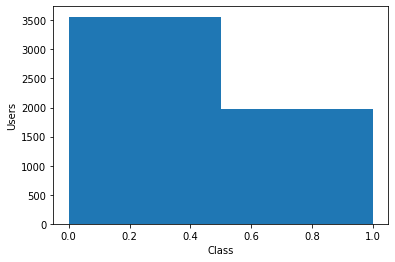

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(tr_y))
plt.hist(tr_y, bins=len(set(tr_y)))
plt.ylabel('Users');
plt.xlabel('Class');

# Un ojo a los datos

In [16]:
tr_txt[:10]

['lo peor de todo es que no me dan por un tiempo y luego vuelven estoy hasta la verga de estl\n',
 'a la vga no seas mamón 45 putos minutos después me dices que apenas sales no me querías avisar en 3 horas? 😑\n',
 'considero que lo más conveniente seria que lo retes a unos vergazos mi jelipe! rómpele la madre a ese pinchi joto!\n',
 'el marica de mi ex me tiene bloqueada de todo así  uno no puede admirar la "belleza" de su garnacha 😂\n',
 'mujer despechadaya pinche amlo hazle esta que se pela la loca #reynosafollow #reynosa\n',
 'putos. no tienen madre. ambriados mantenidos. ojetes. como es posible. mejor matarlos\n',
 'ustedes si puden andar de chanceros pero cuidadito y seamos nosotras porque luego luego empiezan a mamar hijos de la chingada.\n',
 '@usuario jajjaja te digo esa madre si está buena ajjaja\n',
 'odio los putos trámites de titulación 😡😡😡😡😡😡😡😡😡😡😡 pero me urge la precedula.\n',
 '@usuario no te equivocabas mi madre y tu tenían muchísima razón siempre es mejor lo que viene 

### Construcción simple del vocabulario

In [0]:
import nltk

In [0]:
corpus_palabras = []
for doc in tr_txt:
    corpus_palabras += doc.split()
#print(corpus_palabras)
fdist = nltk.FreqDist(corpus_palabras)

In [19]:
fdist

FreqDist({'de': 3342, 'que': 3336, 'a': 2605, 'la': 2417, 'y': 2225, 'no': 1743, 'me': 1582, 'el': 1285, '@usuario': 1243, 'en': 1184, ...})

In [20]:
len(fdist)

17055

In [0]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [0]:
V = sortFreqDict(fdist)
V = V[:5000]

In [0]:
dict_indices = dict()
cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

### Bolsa de Términos

In [0]:
import numpy as np
def build_bow_tr(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = 1
        cont_doc += 1
        
    return BOW

### Debug?

In [25]:
tr_txt[10]

'"no me importa lo que digan esos putos periodistas la puta que los pario oh oh oh hay que alentar a la selección"\n'

In [0]:

fdist_doc = nltk.FreqDist(tr_txt[10].split())

In [27]:
fdist_doc

FreqDist({'que': 3, 'oh': 3, 'la': 2, '"no': 1, 'me': 1, 'importa': 1, 'lo': 1, 'digan': 1, 'esos': 1, 'putos': 1, ...})

### Bolsa de Terminos en Validación

In [0]:
BOW_tr=build_bow_tr(tr_txt, V, dict_indices)

In [29]:
print(V[:10])

[(3342, 'de'), (3336, 'que'), (2605, 'a'), (2417, 'la'), (2225, 'y'), (1743, 'no'), (1582, 'me'), (1285, 'el'), (1243, '@usuario'), (1184, 'en')]


In [0]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
#print(BOW[10])

In [0]:
val_txt, val_y = get_texts_from_file("./mex_val.txt", "./mex_val_labels.txt")

In [0]:
val_y = list(map(int, val_y))

Counter({0: 397, 1: 219})


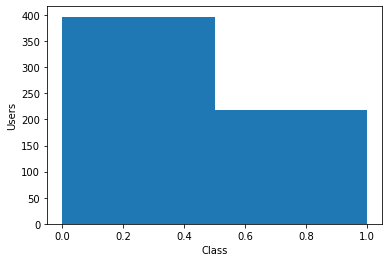

In [33]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

print(Counter(val_y))
plt.hist(val_y, bins=len(set(val_y)))
plt.ylabel('Users');
plt.xlabel('Class');

In [34]:
val_txt[:10]

['así debería ser siempre para que se mueran a la verga\n',
 'cada día me siento como un perro ovejero tratando de cuidar sus ovejas vale madre pinches rateros póngase a trabajar.😤\n',
 'hijo de tu puta madre nadamas te la pasas mamando pinche wilo de closet\n',
 'soñé horrible espero no se cumpla putos temblores.\n',
 '@usuario mejor vas y la chingas tú veo tus publicaciones y solo denotan inconformidad como típico ciudadano quejumbroso que no hace nada por cambiar\n',
 'y quizás este loca y quizás me guste estarlo... #siempreneruda\n',
 'me tienen hasta la verga con sus putos #boomerang pendejos y sin sentido.\n',
 'cuando va a ser el día que encuentre a alguien en quien pueda  confiar posts la re puta madre?\n',
 '#ahoritaestoypensando  como putas puede pasar esto?\n',
 '#todoibabienpero valio madre ya me atacó el insomnio🙅\n']

In [0]:
BOW_val=build_bow_tr(val_txt, V, dict_indices)

### Clasificación

In [36]:
import csv
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
    
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_tr, tr_y) 

y_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[327  70]
 [ 58 161]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84       397
           1       0.70      0.74      0.72       219

    accuracy                           0.79       616
   macro avg       0.77      0.78      0.78       616
weighted avg       0.80      0.79      0.79       616



### Errores

In [0]:
incorrect = []
for e in zip(val_y,y_pred,range(len(val_y))):
    #print(e[0])
    #print(e[1])
    if e[0] != e[1]:
        incorrect += [e[2]]

In [38]:
for e in incorrect:
    case = e
    if "madre" in val_txt[case].strip():
        print("Texto: ", val_txt[case].strip())
        print("Truth: ", val_y[case])
        print("Pred: ", y_pred[case])
        #print("PredProba: ", y_pred_proba[case])

Texto:  ya a cualquier prieto le dicen licenciado peludito tengan madre
Truth:  1
Pred:  0
Texto:  ahora si a chingar a su madre la fecha fifa y ahora si a disfrutar de nuestra gloriosa liga mx.
Truth:  0
Pred:  1
Texto:  por qué chingadasmadres no matan al rival puta madre!!! @usuario 😡😡😡😡😡😡😡😡😡
Truth:  0
Pred:  1
Texto:  la neta... si yo fuera messi les dijera "chinguen a su madre putos yo hice todo".
Truth:  0
Pred:  1
Texto:  qué pedo ..?? con el norte llueve o que verga ..??? mucho desmadre de tráfico y el metro del pitó !!!
Truth:  0
Pred:  1
Texto:  pinche hocicón... ya acepta la voluntad de tu madre... sí es que tienes que lo dudo tu misma madre te mando a la verga del testamento...
Truth:  1
Pred:  0
Texto:  no quería mentarte la madre tan temprano pinche maricón il "buasap" pinche millenial cacha moscas
Truth:  1
Pred:  0
Texto:  los putos a chin.... a su madre! ya me harté de seguir todo el mundo seguiré lo que yo quiera.
Truth:  1
Pred:  0
Texto:  @usuario no tienen abuela m

# Tu turno:
## Realiza los siguientes ejercicios en esta clase:

## 1) Bolsa de Palabras con frecuencia y clasifique: Haga bolsa de palabras en dónde cada término tenga frecuencia bruta en lugar de pesado binario

In [0]:
def build_bow_tr_frec(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1

    return BOW

In [0]:
BOW_txt_frec = build_bow_tr_frec(tr_txt, V, dict_indices)
BOW_val_frec = build_bow_tr_frec(val_txt, V, dict_indices)

In [41]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec, tr_y) 

y_pred = grid.predict(BOW_val_frec)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[335  62]
 [ 52 167]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       397
           1       0.73      0.76      0.75       219

    accuracy                           0.81       616
   macro avg       0.80      0.80      0.80       616
weighted avg       0.82      0.81      0.82       616



## 2) Bolsa de Palabras con frecuencia normalizada y clasifique: Haga bolsa de palabras en dónde cada término tenga frecuencia normalizada a sumar 1 por documento

In [0]:
def build_bow_tr_frec_norm(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        len_fd = len(fdist_doc)
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word] / len_fd
        cont_doc += 1

    return BOW

In [0]:
BOW_txt_frec_norm = build_bow_tr_frec_norm(tr_txt, V, dict_indices)
BOW_val_frec_norm = build_bow_tr_frec_norm(val_txt, V, dict_indices)

In [44]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec_norm, tr_y) 

y_pred = grid.predict(BOW_val_frec_norm)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[313  84]
 [ 54 165]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       397
           1       0.66      0.75      0.71       219

    accuracy                           0.78       616
   macro avg       0.76      0.77      0.76       616
weighted avg       0.79      0.78      0.78       616



## 3) Bolsa de Palabras Normalizada con la norma del vector (un vector unitario por documento)

In [0]:
def build_bow_tr_frec_norm(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        len_fd = len(fdist_doc)
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word] / len_fd
        cont_doc += 1
    
    for row in BOW:
        row /= np.linalg.norm(row) or 1

    return BOW

In [0]:
BOW_txt_frec_norm = build_bow_tr_frec_norm(tr_txt, V, dict_indices)
BOW_val_frec_norm = build_bow_tr_frec_norm(val_txt, V, dict_indices)

In [47]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec_norm, tr_y) 

y_pred = grid.predict(BOW_val_frec_norm)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[318  79]
 [ 54 165]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       397
           1       0.68      0.75      0.71       219

    accuracy                           0.78       616
   macro avg       0.77      0.78      0.77       616
weighted avg       0.79      0.78      0.79       616



## 4) Bolsa de Palabras con TFIDF y clasifique

In [0]:
def build_bow_tr_tfidf(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    
    N = len(tr_txt)
    
    frecs_history = [nltk.FreqDist(tr.split()) for tr in tr_txt]
    
    for n_doc, tr in enumerate(tr_txt):
        fdist_doc = frecs_history[n_doc]
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word] / len(fdist_doc)
                for fh in frecs_history:
                    count = 0
                    if word in fh:
                        count +=1
                BOW[cont_doc, dict_indices[word]] *= math.log(len(tr_txt) / (count + 1))
        cont_doc += 1
        
    return BOW

In [0]:
BOW_txt_frec_norm = build_bow_tr_tfidf(tr_txt, V, dict_indices)
BOW_val_frec_norm = build_bow_tr_tfidf(val_txt, V, dict_indices)

In [50]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec_norm, tr_y) 

y_pred = grid.predict(BOW_val_frec_norm)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[344  53]
 [ 72 147]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       397
           1       0.73      0.67      0.70       219

    accuracy                           0.80       616
   macro avg       0.78      0.77      0.77       616
weighted avg       0.79      0.80      0.79       616



 ## 5) (Opcional) Mismo que anterior pero normalizando TFIDF con la norma del vector

In [0]:
def build_bow_tr_tfidf_norm(tr_txt, V, dict_indices):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=np.float64)
    cont_doc = 0
    
    N = len(tr_txt)
    
    frecs_history = [nltk.FreqDist(tr.split()) for tr in tr_txt]
    
    for n_doc, tr in enumerate(tr_txt):
        fdist_doc = frecs_history[n_doc]
        for word in fdist_doc:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word] / len(fdist_doc)
                for fh in frecs_history:
                    count = 0
                    if word in fh:
                        count +=1
                BOW[cont_doc, dict_indices[word]] *= math.log(len(tr_txt) / (count + 1))
        cont_doc += 1
    
    for row in BOW:
        row /= np.linalg.norm(row) or 1
        
    return BOW

In [0]:
BOW_txt_frec_norm = build_bow_tr_tfidf_norm(tr_txt, V, dict_indices)
BOW_val_frec_norm = build_bow_tr_tfidf_norm(val_txt, V, dict_indices)

In [53]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec_norm, tr_y) 

y_pred = grid.predict(BOW_val_frec_norm)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[317  80]
 [ 54 165]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       397
           1       0.67      0.75      0.71       219

    accuracy                           0.78       616
   macro avg       0.76      0.78      0.77       616
weighted avg       0.79      0.78      0.78       616



## 6) (Opcional) Bolsa de Palabras con Top 10000 palabras más frecuentes

In [0]:
def build_bow_top(tr_txt, V, dict_indices, top=1000, jump=0):
    BOW = np.zeros((len(tr_txt),len(V)), dtype=int)
    cont_doc = 0
    for tr in tr_txt:
        fdist_doc = nltk.FreqDist(tr.split())
        fdist_doc_sorted = sorted(fdist_doc.items(), key=lambda item: item[1], reverse=True)
        for word, _ in fdist_doc_sorted[jump:jump+top]:
            if word in dict_indices:
                BOW[cont_doc, dict_indices[word]] = fdist_doc[word]
        cont_doc += 1

    return BOW

In [0]:
BOW_txt_frec_norm = build_bow_top(tr_txt, V, dict_indices, top=10000)
BOW_val_frec_norm = build_bow_top(val_txt, V, dict_indices, top=10000)

In [56]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec_norm, tr_y) 

y_pred = grid.predict(BOW_val_frec_norm)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[335  62]
 [ 52 167]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       397
           1       0.73      0.76      0.75       219

    accuracy                           0.81       616
   macro avg       0.80      0.80      0.80       616
weighted avg       0.82      0.81      0.82       616



## 7) (Opcional) Bolsa de Palabras descartando las top 1000 palabras más frecuentes y tomando las siguientes 5000

In [0]:
BOW_txt_frec_norm = build_bow_top(tr_txt, V, dict_indices, top=5000, jump=1000)
BOW_val_frec_norm = build_bow_top(val_txt, V, dict_indices, top=5000, jump=1000)

In [58]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_txt_frec_norm, tr_y) 

y_pred = grid.predict(BOW_val_frec_norm)

p, r, f, _ = precision_recall_fscore_support(val_y, y_pred, average='macro', pos_label=None)

print(confusion_matrix(val_y, y_pred))
print(metrics.classification_report(val_y, y_pred))

[[  0 397]
 [  0 219]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       397
           1       0.36      1.00      0.52       219

    accuracy                           0.36       616
   macro avg       0.18      0.50      0.26       616
weighted avg       0.13      0.36      0.19       616



/home/esau/.pyenv/versions/3.7.6/envs/stuffs/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
